# Filters
----
The purpose of this document is to investigate the propensity of various filters to enhance cracks and suppress noise.

In [ ]:
# Create a generic tool that accepts a filtering function then plots twenty images

In [7]:
import matplotlib.pyplot as plt
from skimage.filters import rank
from skimage.exposure import rescale_intensity
from scipy.ndimage.filters import convolve
from skimage import morphology
from scipy.misc import imread
from glob import glob
import numpy as np
import skimage
%matplotlib inline

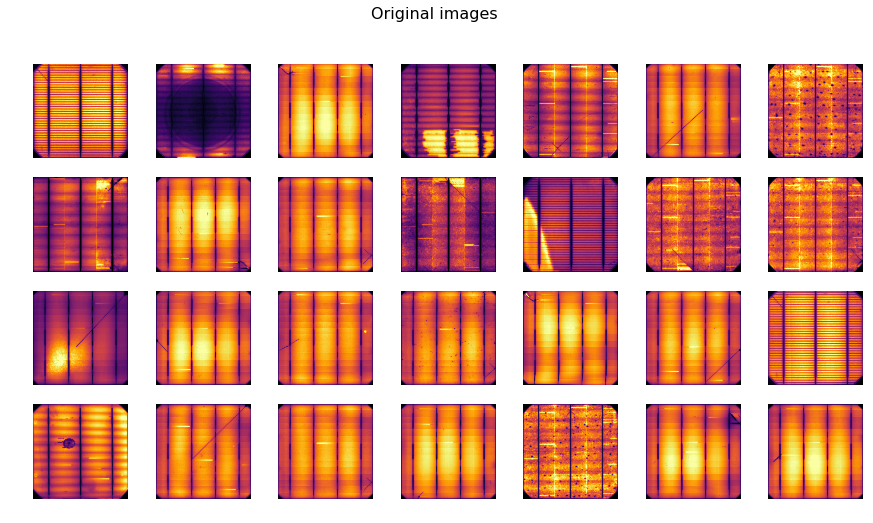

In [8]:
def identity_filter(image):
    return image

def plot_filter_results(filter_function, cmap = 'gray', title='Filter results'):
    f, axs = plt.subplots(4, 7, figsize = (15, 8))
    f.suptitle(title, fontsize = 16)
    axs = axs.flatten()
    i = 0
    for ax in axs:
        ax.imshow(filter_function(demo_images[i]), cmap = cmap)
        ax.axis('off')
        i += 1

demo_images   = np.array([imread(fp) for fp in glob('.\\data\\resized-images\*.png')])
demo_image_ix = [0, 1, 3, 4, 8, 9, 11, 13, 14, 17, 18, 21, 23, 26, 30, 32, 33, 35, 37, 38, 39, 42, 44, 45, 46, 47, 48, 51]
demo_images   = demo_images[demo_image_ix]
plot_filter_results(identity_filter, title = 'Original images', cmap = 'inferno')

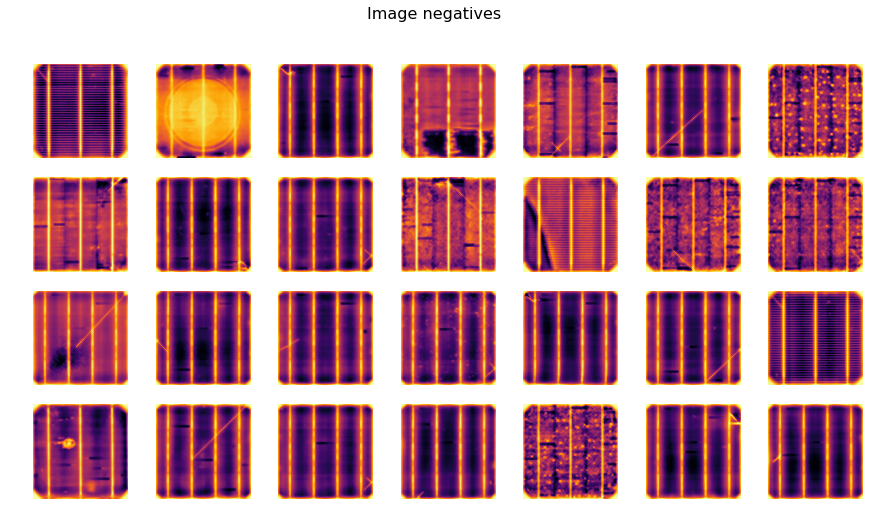

In [233]:
def invert(image):
    return 255 - image

plot_filter_results(chain(invert, convolve_with_cross), cmap = 'inferno', title = 'Image negatives')

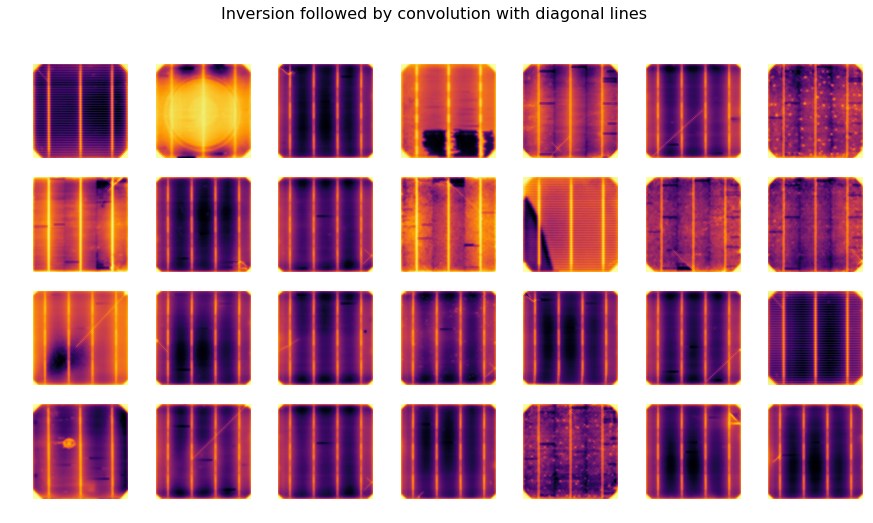

In [10]:
def convolve_with_cross(image):
    size           = 25
    image          = image*1. # cast to float
    filtered_image = convolve(image, np.eye(size)) + convolve(image, np.flip(np.eye(size), 0))
    filtered_image = rescale_intensity(filtered_image, out_range='uint8').astype(np.uint8)
    return filtered_image

def chain(*args):
    def function_chain(image):
        for arg in args:
            image = arg(image)
        return image
    return function_chain

plot_filter_results(chain(invert, convolve_with_cross),
                    cmap = 'inferno', title = 'Inversion followed by convolution with diagonal lines')

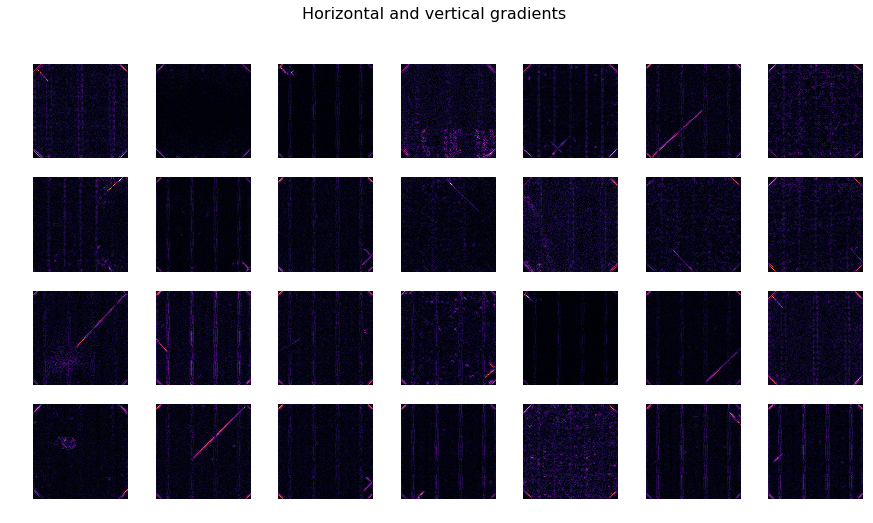

In [219]:
def horizontal_bar_gradients(image):
    size = 6
    horizontal_bar = np.zeros([size, size])
    horizontal_bar[:, int(size/2)] = 1
    filtered_image = rank.gradient(image, horizontal_bar)
    return filtered_image

def vertical_bar_gradients(image):
    size = 6
    vertical_bar = np.zeros([size, size])
    vertical_bar[int(size/2), :] = 1
    filtered_image = rank.gradient(image, vertical_bar)
    return filtered_image

plot_filter_results(chain(invert, convolve_with_cross, horizontal_bar_gradients, vertical_bar_gradients), 
                    cmap = 'inferno', title = 'Horizontal and vertical gradients')

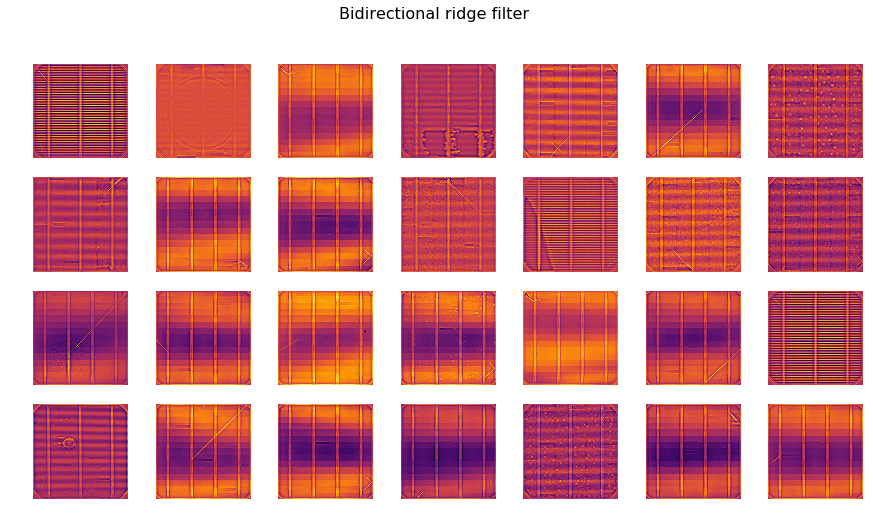

In [185]:
def bidirectional_ridge_filter(image):
    size               = 10
    ridge_kernel       = np.eye(size)
    ridge_kernel[[0, -1], [0, -1]] = -4
    filtered_image  = convolve(image*1., ridge_kernel) + convolve(image*1., np.flip(ridge_kernel, 0))
    filtered_image  = rescale_intensity(filtered_image, out_range='uint8').astype(np.uint8)
    return filtered_image

plot_filter_results(chain(invert, convolve_with_cross, bidirectional_ridge_filter),
                   cmap = 'inferno', title = 'Bidirectional ridge filter')

In [330]:
def denoise(image):
    filtered_image = skimage.restoration.denoise_bilateral(image, multichannel = False)
    return filtered_image

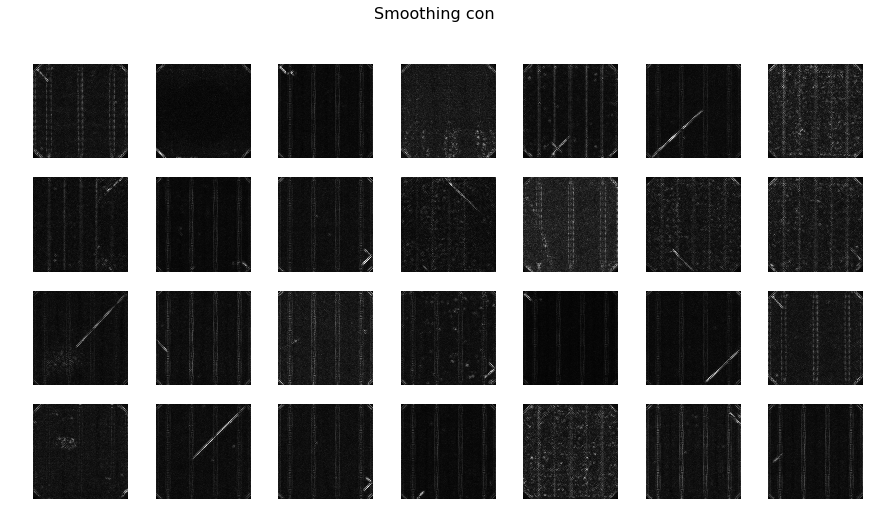

In [331]:
def hysteresis_threshold(image):
    thresh = 30
    return image > thresh

f = chain(invert, convolve_with_cross, bidirectional_ridge_filter,
                              horizontal_bar_gradients, vertical_bar_gradients, denoise)

plot_filter_results(f, title = 'Smoothing con')

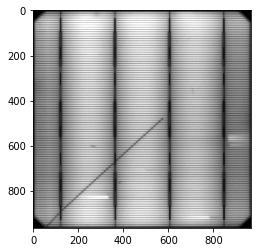

In [541]:
sample_image = demo_images[5]
plt.imshow(sample_image);

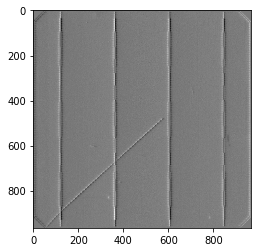

In [542]:
sobel_v = skimage.filters.sobel_v(invert(sample_image))
plt.imshow(sobel_v);

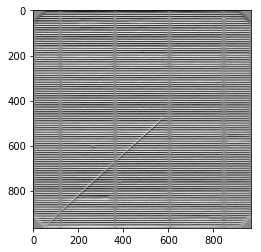

In [543]:
sobel_h = skimage.filters.sobel_h(invert(sample_image))
plt.imshow(sobel_h);

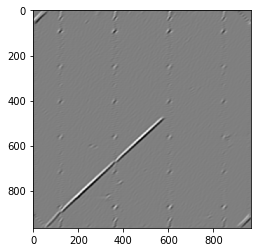

In [544]:
plt.imshow(gabor_filter(sobel_h*sobel_v));

In [440]:
def gabor_filter(image):
    Re, Im = skimage.filters.gabor(image, frequency=0.05, theta = np.pi/4, bandwidth=2, offset=np.pi/2)
    return Re

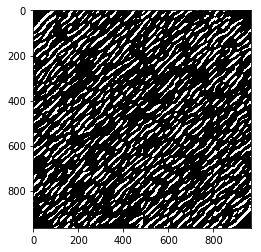

In [403]:
plt.imshow(gabor_filter(sample_image));

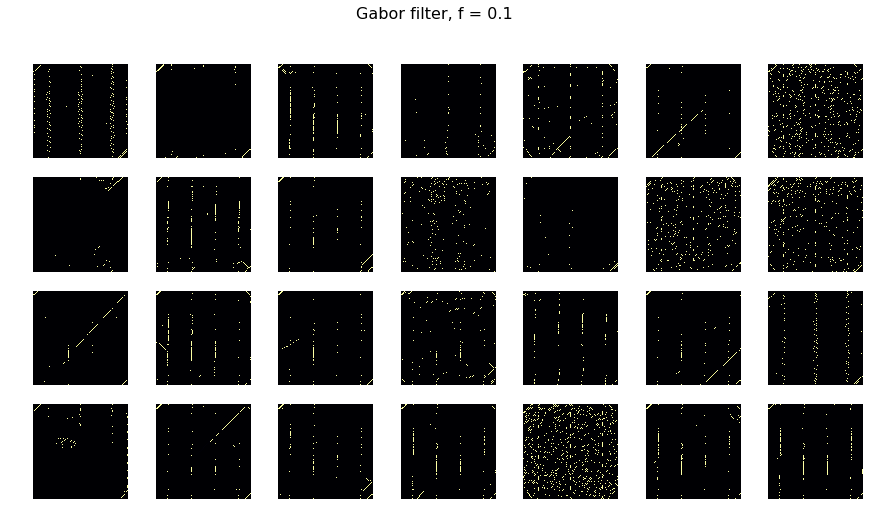

In [170]:
plot_filter_results(gabor_filter,
                    cmap = 'inferno', title = 'Gabor filter, f = 0.1')

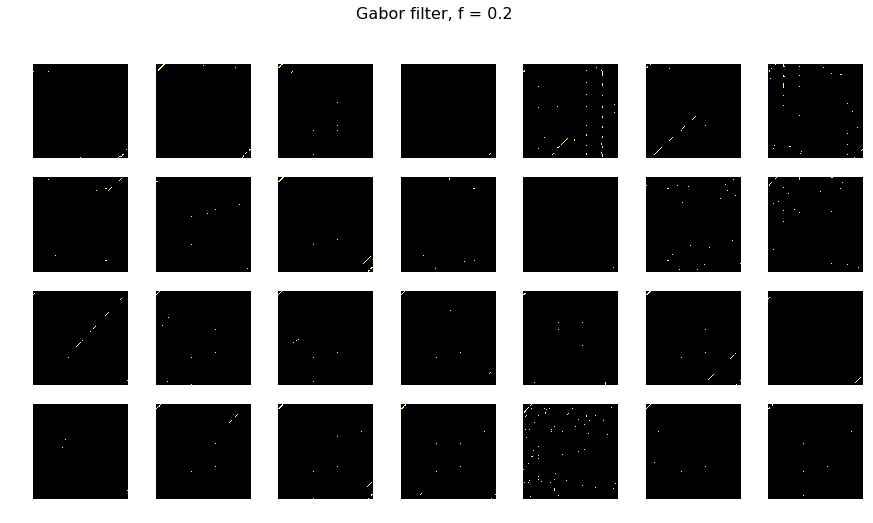

In [172]:
plot_filter_results(gabor_filter,
                    cmap = 'inferno', title = 'Gabor filter, f = 0.2')

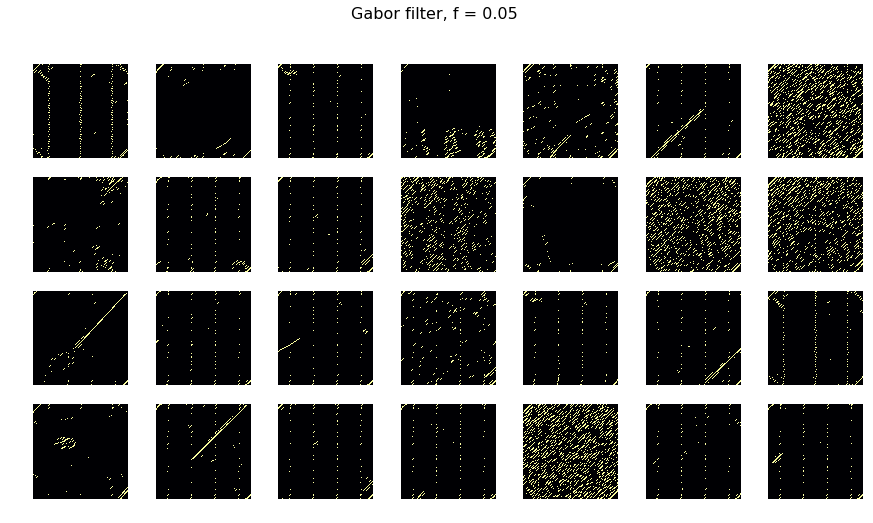

In [174]:
plot_filter_results(chain(gabor_filter, skimage.morphology.
                    cmap = 'inferno', title = 'Gabor filter, f = 0.05')

In [158]:
kernel  = skimage.filters.gabor_kernel(frequency = 1/15, theta = np.pi/4, bandwidth = 1,
                                 sigma_x = None, sigma_y = None, n_stds = 1, offset = 0)

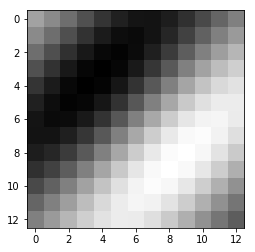

In [163]:
plt.imshow(np.imag(kernel));

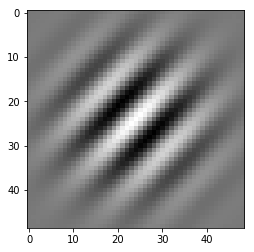

In [64]:
plt.imshow(np.real(kernel))